# Basic Algorithms Implementations

In [16]:
# import basic libraries
import pandas as pd
import numpy as np


## Normal Equation Implementation

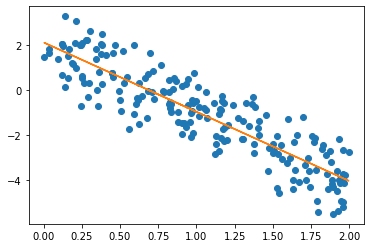

In [24]:
import matplotlib.pyplot as plt
X = 2 * np.random.rand(200, 1)#200random values between 0 and 2
y = 2-3 * X + np.random.randn(200,1)#Gaussian (normal) noise is added
plt.scatter(np.array(X),np.array(y))
X_b = np.c_[np.ones((200, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#theta_best
plt.plot(X_b,X_b*theta_best[1]+theta_best[0])

## Gradient Descent Implementation

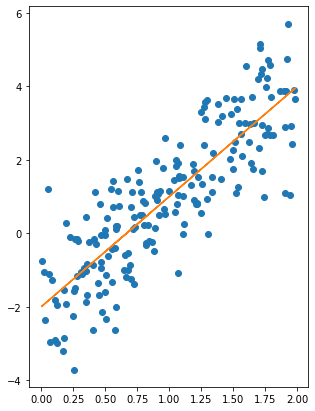

In [25]:
eta = 0.2 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
X = 2 * np.random.rand(200, 1)#200random values between 0 and 2
y =-2+3 * X + np.random.randn(200,1)#Gaussian (normal) noise is added
X_b = np.c_[np.ones((200, 1)), X]
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
plt.figure(figsize=(5,7))
plt.scatter(np.array(X),np.array(y))
plt.plot(X_b,X_b*theta[1]+theta[0])
#theta

/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


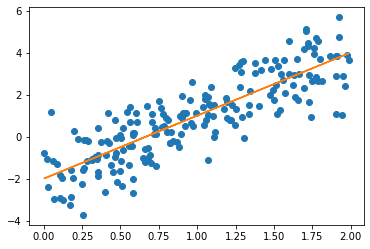

In [39]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)
plt.scatter(np.array(X),np.array(y))
plt.plot(X_b,X_b*sgd_reg.coef_+sgd_reg.intercept_)


## Stochastic Gradient Descent Implementation

/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


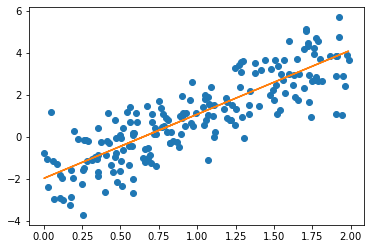

In [40]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)
plt.scatter(np.array(X),np.array(y))
plt.plot(X_b,X_b*sgd_reg.coef_+sgd_reg.intercept_)

## Polynomial Regression

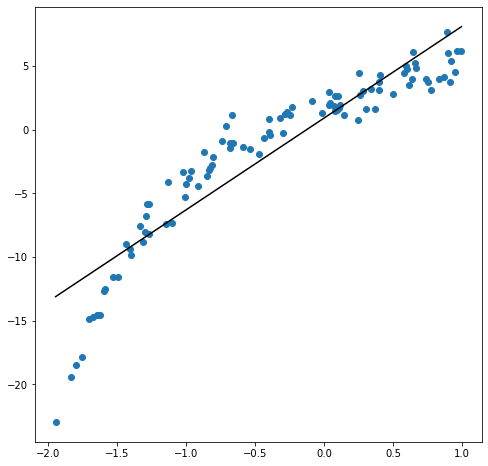

In [41]:
X=3*np.random.rand(100,1)-2
y=2+(X**3)*2-(X**2)+(X*3)+np.random.randn(100,1)
plt.figure(figsize=(8,8))
plt.scatter(np.array(X),np.array(y))
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
polyreg=make_pipeline(PolynomialFeatures(degree=1),LinearRegression())#Underfitting
polyreg.fit(X,y)
#X_poly[0]
#lin_reg.intercept_
#lin_reg.coef_
#plt.plot(X,lin_reg.predict(X_poly))
X_seq = np.linspace(X.min(),X.max(),200).reshape(-1,1)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")

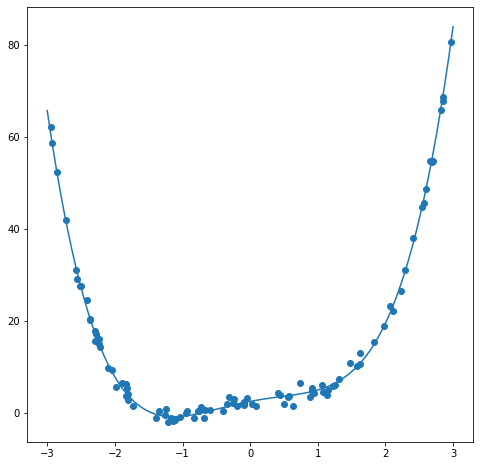

In [42]:
#Another illustration of polynomial regression
X=6*np.random.rand(100,1)-3
y=2+(X**4)*1-(X**2)+(X*3)+np.random.randn(100,1)
plt.figure(figsize=(8,8))
plt.scatter(np.array(X),np.array(y))
x=X.flatten()
Y=y.flatten()
mymodel = np.poly1d(np.polyfit(x,Y,4))#Overfitting
myline = np.linspace(-3,3,100)
plt.plot(myline, mymodel(myline))

## Visualiing the Degree of Overfit or Underfit

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

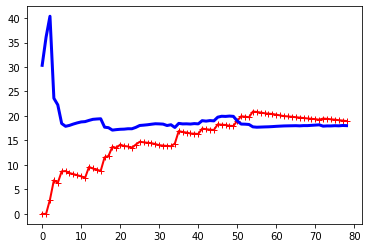

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

The blue curve shows validation data error and red one shows training data errors.Initially red errors are 0 as they perfectly fit but then due to randomness it couldn't fit and reaches a plateau.Blue errors show generalization errors and initially model can't generalise implying high errors but then it trains and it also reaches a plateau.This kind of learning curve is for underfit

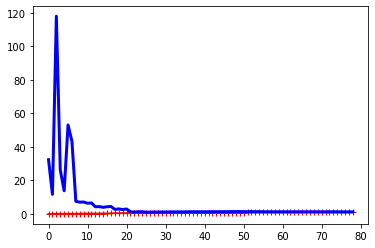

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=8,include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

Its quite similar to previous one but due to polynomial regression, validation/blue errors are quite large and fitting/training errors remain small.Its a feature for overfitting

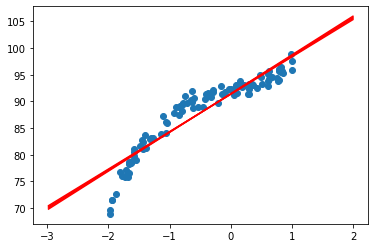

In [48]:
#Ridge regression implementation which regularizes(or say normalizes) the cost function
from sklearn.linear_model import Ridge
X=3*np.random.rand(100,1)-2
y=92+(X**3)*2+(X*3)+np.random.randn(100,1)
#plt.figure(figsize=(10,10))
X_seq = np.linspace(X.min()-1,X.max()+1,200).reshape(-1,1)
plt.scatter(np.array(X),np.array(y))
for t in range(0,4):
    polyreg=make_pipeline(PolynomialFeatures(degree=1),Ridge(alpha=t,solver="cholesky"))
    polyreg.fit(X,y)
    plt.plot(X_seq,polyreg.predict(X_seq),color="red")

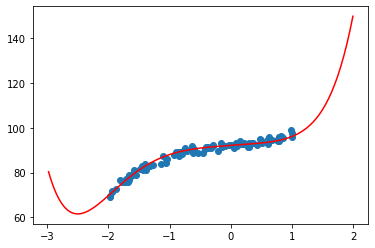

In [49]:
plt.scatter(np.array(X),np.array(y))
polyreg=make_pipeline(PolynomialFeatures(degree=6),Ridge(alpha=17,solver="cholesky"))
polyreg.fit(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="red")

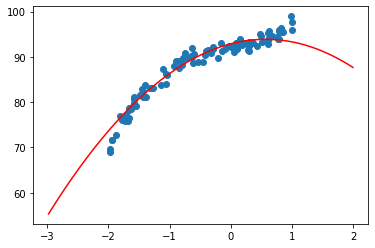

In [50]:
#Lasso(Least absolute shrinkage and selection operator) regression
from sklearn.linear_model import Lasso
plt.scatter(np.array(X),np.array(y))
polyreg=make_pipeline(PolynomialFeatures(degree=2),Lasso(alpha=.6))
polyreg.fit(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="red")

Both regularized regressions can be used in stochastic gradient descent using penalty term....For Ridge it is l2 and for lasso its l1

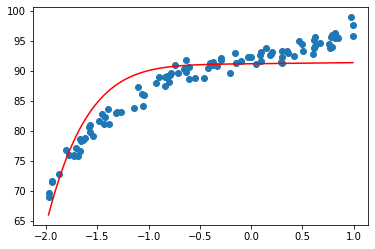

In [51]:
#Elastic net implementation
X_seq = np.linspace(X.min(),X.max(),200).reshape(-1,1)
from sklearn.linear_model import ElasticNet
plt.scatter(np.array(X),np.array(y))
polyreg=make_pipeline(PolynomialFeatures(degree=6),ElasticNet(alpha=11,l1_ratio=1e-4))
polyreg.fit(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="red")

## Logistic Regression Iplementation

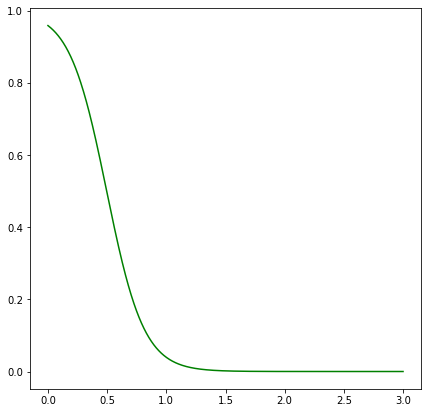

In [52]:
plt.figure(figsize=(7,7))
M=np.random.rand(200,1) 
n=[]
for i in range(0,200):
    if (M[i]>=0.5):
        n.append(1)
    else:
        n.append(0)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(M,n)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,0], "g-")

array([[9.99854944e-01, 1.45056176e-04]])

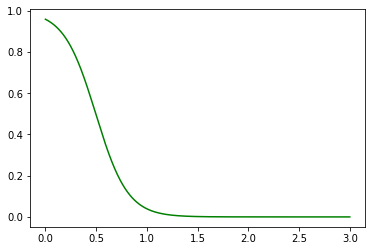

In [53]:
#Softmax regression implementation
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(M, n)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,0], "g-")
softmax_reg.predict_proba([[.05]])

In [61]:
house=pd.read_csv("housing/housing.csv")
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Text(0.5, 0, 'ocean proximity')

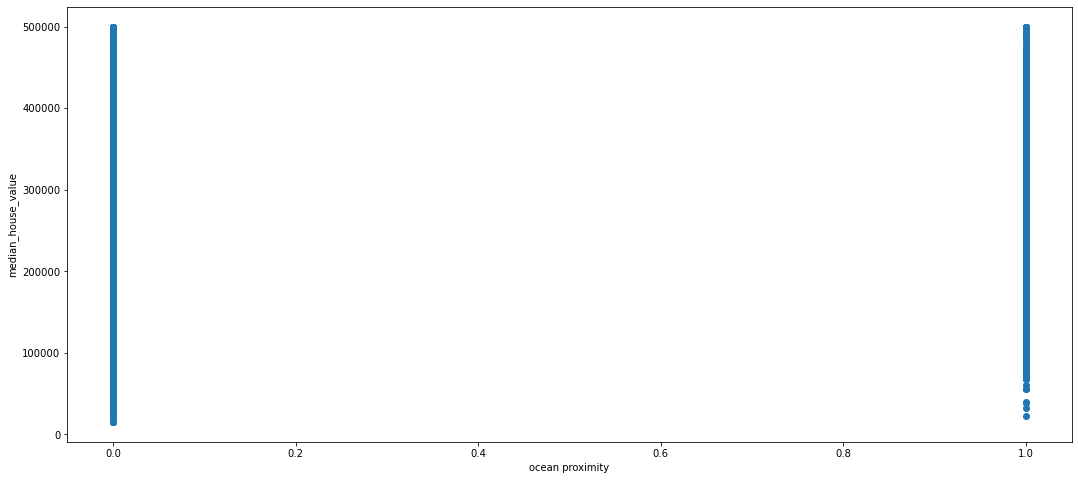

In [62]:
import seaborn as sns
X=[]
for i in range(0,20640):
    if (house['ocean_proximity'][i]=="NEAR BAY"):
        X.append(1)
    else:
        X.append(0)
y=house['median_house_value']
plt.figure(figsize=(18,8))
plt.scatter(X,y)
plt.ylabel("median_house_value")
plt.xlabel("ocean proximity")

In [63]:
from sklearn.preprocessing import MinMaxScaler
k=np.array(house['median_house_value'])
k_=np.reshape(k,(-1,1))
housing_new=MinMaxScaler().fit_transform(k_)
housing_new

array([[0.90226638],
       [0.70824656],
       [0.69505074],
       ...,
       [0.15938285],
       [0.14371281],
       [0.15340349]])

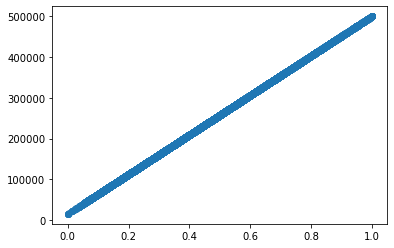

In [64]:
housing_new_=housing_new.flatten()
plt.scatter(housing_new_,y)

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder()
#house_rel=ordi.fit_transform([house["ocean_proximity"]])
housing_cat=house["ocean_proximity"]
housing_num=house.drop('ocean_proximity',axis=1)
num1=list(housing_num)
full_pipeline = ColumnTransformer([
("Normalize", MinMaxScaler(), num1),
("cat", OneHotEncoder(), ["ocean_proximity"]),
])
h_=full_pipeline.fit_transform(house)
housing_final=pd.DataFrame(h_,columns=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value","1","2","3","4","5"])
housing_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,1,2,3,4,5
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.0,1.0,0.0,0.0,0.0


Text(0, 0.5, 'Value')

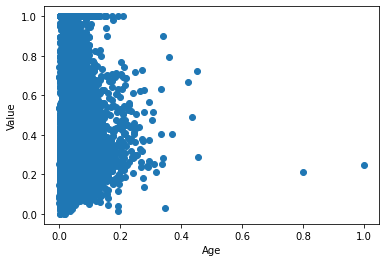

In [66]:
plt.scatter(housing_final["population"],housing_final["median_house_value"])
plt.xlabel("Age")
plt.ylabel("Value")

In [67]:
data=housing_final['median_house_value']
minimum=np.min(data)
maximum=np.max(data)
mean_d=np.mean(data)
median_d=np.median(data)
std_price=np.std(data)
print("Minimum price: ${}".format(minimum)) 
print("Maximum price: ${}".format(maximum))
print("Mean price: ${}".format(mean_d))
print("Median price ${}".format(median_d))
print("Standard deviation of prices: ${}".format(std_price))

Minimum price: $0.0
Maximum price: $1.0
Mean price: $0.3955794345361824
Median price $0.33958829035756555
Standard deviation of prices: $0.2379223599162939


In [68]:
for i in housing_final.columns:
    print(i)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
1
2
3
4
5


Text(0, 0.5, 'housing_median_age')

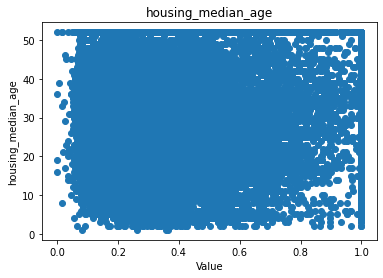

In [69]:
plt.title("housing_median_age")
plt.scatter(data,house['housing_median_age'])
plt.xlabel("Value")
plt.ylabel("housing_median_age")

In [70]:
from sklearn.metrics import r2_score
def performance_metric(y_true,y_predict):
    score=r2_score(y_true,y_predict)
    return score
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [72]:
from sklearn.model_selection import train_test_split
features=housing_final.drop(['median_house_value','longitude','latitude','1','2','3','4'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(data,features,test_size=0.2,random_state=0)

In [74]:
import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):

        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')

        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


In [75]:
features=features.fillna(0)
data = data.fillna(lambda x: x.median())
data=data.astype(np.float32)
#features=features.astype(np.float32)
#ModelLearning(features,data)
data.isnull().any()

False

/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-d

/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/tmp/ipykernel_9307/2626583740.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


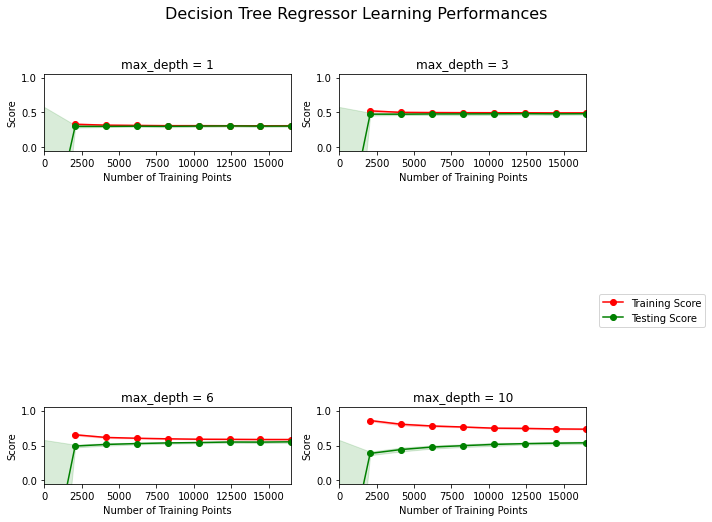

In [76]:
ModelLearning(features,data)

In [77]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """

    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()

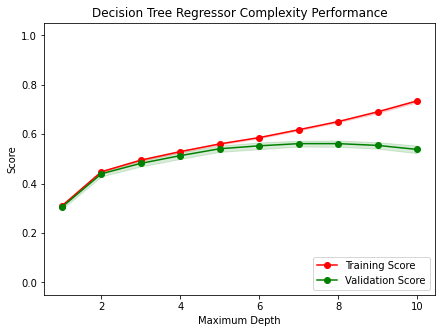

In [78]:
ModelComplexity(features,data)

## Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [80]:
X_train,X_test,y_train,y_test=train_test_split(features,data,test_size=0.2,random_state=0)
X_=np.reshape(np.array(y_train),(-1,1))
reg = fit_model(X_train,X_)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 7 for the optimal model.


In [81]:
client_data = [[0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.8]]

# Show predictions
'''for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))'''
reg.predict(client_data)

array([0.97058986])

In [82]:
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)

        # Fit the data
        reg = fitter(X_train, y_train)

        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)

        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [83]:
PredictTrials(features, data, fit_model, client_data)

Trial 1: $0.97
Trial 2: $0.94
Trial 3: $0.97
Trial 4: $1.00
Trial 5: $0.97
Trial 6: $0.96
Trial 7: $0.96
Trial 8: $0.98
Trial 9: $0.97
Trial 10: $0.98

Range in prices: $0.06


In [84]:
data=house['median_house_value']
data.fillna(0)
features=house.drop(['median_house_value','longitude','latitude','ocean_proximity'],axis=1)
features.fillna(0)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,18.0,697.0,150.0,356.0,114.0,2.5568
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,18.0,1860.0,409.0,741.0,349.0,1.8672


In [85]:
data.isnull().any()

False

In [86]:
features.isnull().any()

housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
dtype: bool

In [87]:
features.total_bedrooms.fillna(lambda x: x.median())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: object

In [88]:
features.isnull().any()

housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
dtype: bool

In [89]:
features.astype('float32')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,18.0,697.0,150.0,356.0,114.0,2.5568
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,18.0,1860.0,409.0,741.0,349.0,1.8672


In [90]:
data.astype('float32')

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float32

In [91]:
features.total_bedrooms.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [92]:
rows_with_nan = []
for index, row in features.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

print(rows_with_nan)

[290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606, 2028, 2115, 2301, 2323, 2334, 2351, 2412, 2420, 2578, 2608, 2647, 2826, 3024, 3328, 3354, 3376, 3482, 3485, 3529, 3721, 3778, 3912, 3921, 3958, 4043, 4046, 4186, 4279, 4309, 4391, 4447, 4496, 4591, 4600, 4629, 4667, 4691, 4738, 4743, 4744, 4767, 4852, 5059, 5216, 5222, 5236, 5654, 5665, 5678, 5723, 5751, 5990, 6052, 6068, 6220, 6241, 6253, 6298, 6421, 6541, 6590, 6814, 6835, 6962, 7097, 7113, 7168, 7191, 7228, 7316, 7330, 7547, 7654, 7668, 7763, 7806, 8337, 8383, 8530, 8915, 9149, 9571, 9620, 9622, 9814, 9845, 9877, 9942, 9970, 10033, 10216, 10236, 10385, 10389, 10428, 10495, 10761, 10885, 10915, 11096, 11311, 11351, 11441, 11449, 11512, 11741, 12101, 12414, 12570, 12809, 13015, 13069, 13311, 13332, 13336, 13597, 13656, 13706, 13925, 13932, 13933, 14015, 14152, 14173, 14307, 14331, 14386, 14462, 14521, 14641, 14930, 14970, 14986, 15030, 15060, 15118, 15137, 15397, 15479, 15607, 15663, 15890, 15975, 16025, 16038, 16104, 16105,

In [93]:
features.total_bedrooms.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: total_bedrooms, Length: 20640, dtype: bool

In [94]:
features['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [95]:
features['total_bedrooms'].fillna(1)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [96]:
features['total_bedrooms'].isnull().any()

True

In [100]:
features=features.drop(['total_bedrooms'],axis=1)

KeyError: "['total_bedrooms'] not found in axis"

In [101]:
features.isnull().any()

housing_median_age    False
total_rooms           False
population            False
households            False
median_income         False
dtype: bool

/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-d

/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/fernando/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/tmp/ipykernel_9307/2626583740.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


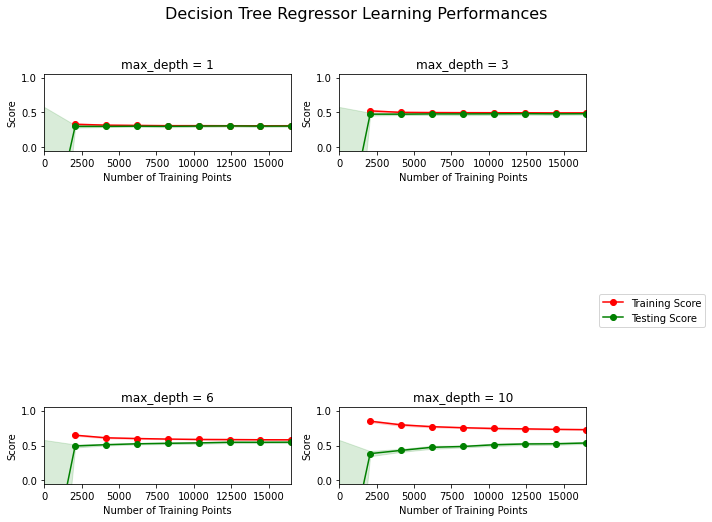

In [102]:
ModelLearning(features,data)

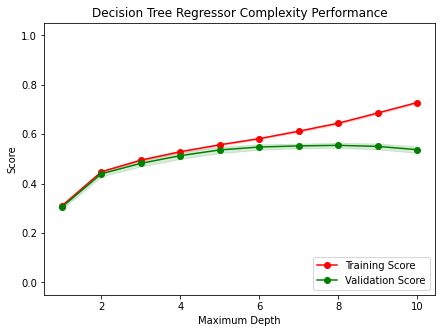

In [103]:
ModelComplexity(features,data)

In [104]:
X_train,X_test,y_train,y_test=train_test_split(features,data,test_size=0.2,random_state=0)
#X_=np.reshape(np.array(y_train),(-1,1))
reg = fit_model(X_train,y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 7 for the optimal model.


In [105]:
features

,housing_median_age,total_rooms,population,households,median_income
0,41.0,880.0,322.0,126.0,8.3252
1,21.0,7099.0,2401.0,1138.0,8.3014
2,52.0,1467.0,496.0,177.0,7.2574
3,52.0,1274.0,558.0,219.0,5.6431
4,52.0,1627.0,565.0,259.0,3.8462
...,...,...,...,...,...
20635,25.0,1665.0,845.0,330.0,1.5603
20636,18.0,697.0,356.0,114.0,2.5568
20637,17.0,2254.0,1007.0,433.0,1.7000
20638,18.0,1860.0,741.0,349.0,1.8672


In [106]:
client_data = [[25.0,1665.0,845.0,330.0,1.5603]]

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
#reg.predict(client_data)

Predicted selling price for Client 1's home: $87,475.69


In [107]:
data

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [108]:
PredictTrials(features, data, fit_model, client_data)

Trial 1: $87,475.69
Trial 2: $85,329.61
Trial 3: $91,825.23
Trial 4: $102,754.89
Trial 5: $77,956.76
Trial 6: $86,015.97
Trial 7: $84,825.60
Trial 8: $91,410.96
Trial 9: $95,476.20
Trial 10: $91,658.81

Range in prices: $24,798.13


In [109]:
predictions=reg.predict(X_train)

In [110]:
type(predictions)

numpy.ndarray

In [111]:
Y=np.array(y_train)

In [112]:
import math
error=[]
for i in range(0,16511):
    k=(Y[i]-predictions[i])
    error.append(k)
print(np.mean(error))
print(np.std(error))

2.4896976304136618
71676.62357301252


## Support Vector Classifier